In [167]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 7)})


In [66]:
titanic_data = pd.read_csv(
    r"D:\Projects\PythonProjects\DS-Rush\data\titanic\train.csv")


In [67]:
titanic_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
X = titanic_data.drop(
    ["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
y = titanic_data.Survived


In [70]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [71]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:
X = pd.get_dummies(X)


In [73]:
X.fillna({"Age": X.Age.median()}, inplace=True)


In [74]:
X.isnull().sum()


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [75]:
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [76]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [77]:
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

[Text(0.6123754528985508, 0.975, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.38530344202898553, 0.925, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.1947463768115942, 0.875, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.08152173913043478, 0.825, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.07427536231884058, 0.775, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.06702898550724638, 0.725, 'Age <= 11.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.059782608695652176, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07427536231884058, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08152173913043478, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.08876811594202899, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3079710144927536, 0.825, 'Embarked_C <= 0.5\nentropy = 0.477\

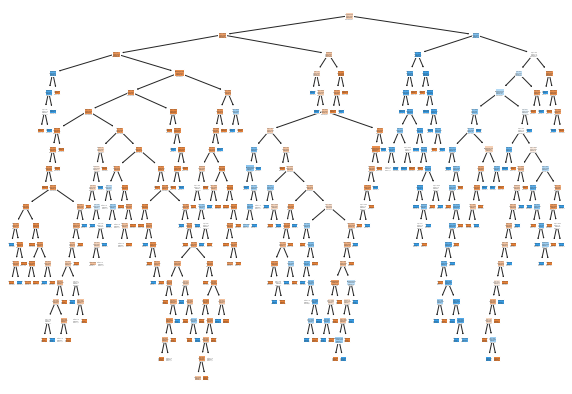

In [78]:
plot_tree(clf,
          filled=True,
          #   class_names=["Negative", "Positive"],
          feature_names=list(X)
          )


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [80]:
X_train.shape


(596, 10)

In [81]:
clf = tree.DecisionTreeClassifier(criterion="entropy")


In [82]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)


0.9798657718120806

In [83]:
clf.score(X_test, y_test)


0.7796610169491526

In [84]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8203389830508474

In [85]:

max_deep_values = range(1, 51)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score]})
    scores_data = pd.concat([scores_data, tmp_score_data])


In [86]:
scores_data.head()


,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


In [87]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score", "test_score"],
                           var_name="set_type",
                           value_name="score")


In [88]:
scores_data_long


,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
95,46,test_score,0.776271
96,47,test_score,0.772881
97,48,test_score,0.766102
98,49,test_score,0.786441


<AxesSubplot:xlabel='max_depth', ylabel='score'>

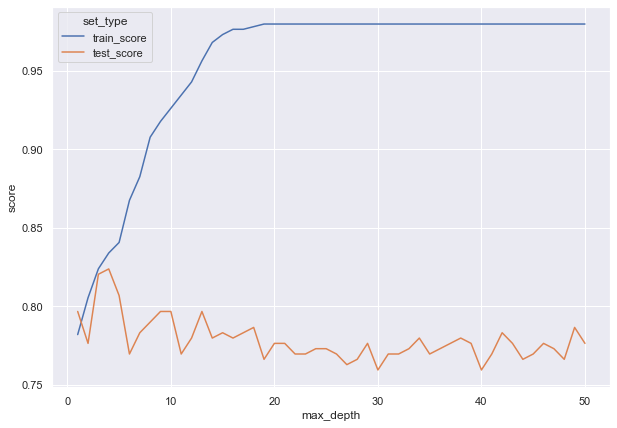

In [89]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


# Cross Validation

In [90]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)


In [91]:
cross_val_score(clf, X_train, y_train, cv=5).mean()


0.7886274509803922

In [92]:

max_deep_values = range(1, 101)
scores_data = pd.DataFrame()
for max_depth in max_deep_values:
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train, )
    test_score = clf.score(X_test, y_test)

    mean_cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()

    tmp_score_data = pd.DataFrame(
        {"max_depth": [max_depth],
         "train_score": [train_score],
         "test_score": [test_score],
         "cross_val_score": [mean_cross_val]})
    
    scores_data = pd.concat([scores_data, tmp_score_data])
    


In [93]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
...,...,...,...,...
0,96,0.979866,0.776271,0.765140
0,97,0.979866,0.776271,0.765140
0,98,0.979866,0.776271,0.768501
0,99,0.979866,0.783051,0.761779


In [94]:
scores_data_long = pd.melt(scores_data, id_vars=["max_depth"],
                           value_vars=["train_score",
                                       "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score")


In [95]:
scores_data_long.query("set_type == 'cross_val_score'").head()


,max_depth,set_type,score
200,1,cross_val_score,0.781961
201,2,cross_val_score,0.770196
202,3,cross_val_score,0.790322
203,4,cross_val_score,0.788627
204,5,cross_val_score,0.800392


<AxesSubplot:xlabel='max_depth', ylabel='score'>

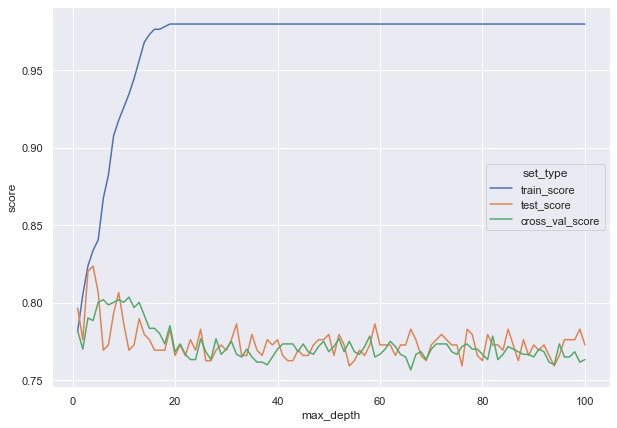

In [96]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")


In [97]:
best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)


In [98]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()


0.8305084745762713

# Grid Search CV

In [143]:
clf = tree.DecisionTreeClassifier()
parametrs = {"criterion": ["gini", "entropy"],
             "max_depth": range(1, 40)}

In [144]:
grid_search_cv_slf = GridSearchCV(clf, parametrs, cv=10)

In [145]:
# Use cross val score
grid_search_cv_slf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 40)})

In [146]:
grid_search_cv_slf.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [147]:
best_clf = grid_search_cv_slf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [148]:
best_clf.score(X_test, y_test)

0.8203389830508474

In [149]:
y_pred = best_clf.predict(X_test)

In [150]:
precision_score(y_test, y_pred)

0.8252427184466019

In [151]:
recall_score(y_test, y_pred)

0.7083333333333334

In [152]:
f1_score(y_test, y_pred)

0.7623318385650224

In [153]:
y_predicted_probability = best_clf.predict_proba(X_test)
y_predicted_probability[:5]

array([[0.86144578, 0.13855422],
       [0.86144578, 0.13855422],
       [0.86144578, 0.13855422],
       [0.02857143, 0.97142857],
       [0.44444444, 0.55555556]])

not always corrctly use limit=0.5

<AxesSubplot:>

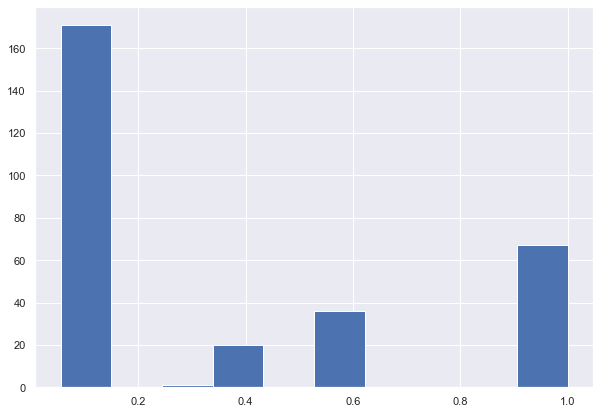

In [154]:
pd.Series(y_predicted_probability[:, 1]).hist()

In [165]:
y_pred = np.where(y_predicted_probability[:, 1] > 0.2, 1, 0)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Precision: 0.75
Recall: 0.775
F1 score: 0.7622950819672132


In [164]:
y_pred = np.where(y_predicted_probability[:, 1] > 0.8, 1, 0)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Precision: 0.9104477611940298
Recall: 0.5083333333333333
F1 score: 0.6524064171122994


# ROC AUC

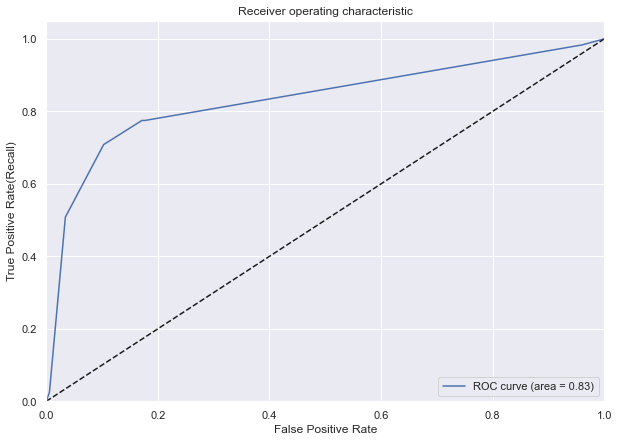

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probability[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")